In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [4]:
# Set default plotting aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
sentiment_df = pd.read_csv('/content/drive/MyDrive/Primetrade.ai/fear_greed_index.csv')
trades_df = pd.read_csv('/content/drive/MyDrive/Primetrade.ai/historical_data.csv')

#### Describe the dataframes

In [35]:

print("\nSentiment Dataframe Description:\n")
display(sentiment_df.info())
display(sentiment_df.describe(include='all'))

print("\nTrades Dataframe Description:\n")
display(trades_df.info())
display(trades_df.describe(include='all'))



Sentiment Dataframe Description:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


None

,timestamp,value,classification,date
count,2.644000e+03,2644.000000,2644,2644
unique,NaN,NaN,5,2644
top,NaN,NaN,Fear,2025-05-02
freq,NaN,NaN,781,1
mean,1.631899e+09,46.981089,NaN,NaN
std,6.597967e+07,21.827680,NaN,NaN
min,1.517463e+09,5.000000,NaN,NaN
25%,1.574811e+09,28.000000,NaN,NaN
50%,1.631900e+09,46.000000,NaN,NaN
75%,1.688989e+09,66.000000,NaN,NaN



Trades Dataframe Description:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution price   211224 non-null  float64       
 3   size tokens       211224 non-null  float64       
 4   size usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   timestamp ist     79225 non-null   datetime64[ns]
 7   start position    211224 non-null  float64       
 8   direction         211224 non-null  object        
 9   closed pnl        211224 non-null  float64       
 10  transaction hash  211224 non-null  object        
 11  order id          211224 non-null  int64         
 12  crossed           211224 non-null  bool          
 13  fee               211224 no

None

,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,79225,2.112240e+05,211224,211224.000000,211224,2.112240e+05,211224,211224.000000,2.112240e+05,2.112240e+05,79225
unique,32,246,NaN,NaN,NaN,2,NaN,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN,188
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,NaN,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN,2025-12-03
freq,40184,68005,NaN,NaN,NaN,108528,NaN,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN,3968
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,2025-05-01 09:10:16.361502208,-2.994625e+04,NaN,48.749001,NaN,6.965388e+10,NaN,1.163967,5.628549e+14,1.737744e+12,NaN
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,2023-01-05 01:06:00,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12,NaN
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,2025-02-02 13:02:00,-3.762311e+02,NaN,0.000000,NaN,5.983853e+10,NaN,0.016121,2.810000e+14,1.740000e+12,NaN
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,2025-06-02 19:46:00,8.472793e+01,NaN,0.000000,NaN,7.442939e+10,NaN,0.089578,5.620000e+14,1.740000e+12,NaN
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,2025-10-01 03:49:00,9.337278e+03,NaN,5.792797,NaN,8.335543e+10,NaN,0.393811,8.460000e+14,1.740000e+12,NaN
max,NaN,NaN,109004.000000,1.582244e+07,3.921431e+06,NaN,2025-12-04 23:55:00,3.050948e+07,NaN,135329.090100,NaN,9.014923e+10,NaN,837.471593,1.130000e+15,1.750000e+12,NaN


#### Data Preprocessing

In [19]:
# Standardize column names
sentiment_df.columns = sentiment_df.columns.str.lower().str.strip()
trades_df.columns = trades_df.columns.str.lower().str.strip()

# Convert dates to datetime objects
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
trades_df['timestamp ist'] = pd.to_datetime(trades_df['timestamp ist'], errors='coerce')

# Create 'date' column in trades_df for merging
trades_df['date'] = trades_df['timestamp ist'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date

print("Trades DataFrame columns after creating 'date':", trades_df.columns)
print("Sentiment DataFrame columns after creating 'date':", sentiment_df.columns)

Trades DataFrame columns after creating 'date': Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp', 'date'],
      dtype='object')
Sentiment DataFrame columns after creating 'date': Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


#### Merged Dataframe

In [20]:
merged_df = pd.merge(trades_df, sentiment_df, on='date', how='inner')

# Drop rows with missing values if any
merged_df.dropna(inplace=True)


In [21]:
print("\nMerged Dataframe Description:")
display(merged_df.info())
display(merged_df.describe(include='all'))


Merged Dataframe Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35864 entries, 0 to 35863
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   account           35864 non-null  object        
 1   coin              35864 non-null  object        
 2   execution price   35864 non-null  float64       
 3   size tokens       35864 non-null  float64       
 4   size usd          35864 non-null  float64       
 5   side              35864 non-null  object        
 6   timestamp ist     35864 non-null  datetime64[ns]
 7   start position    35864 non-null  float64       
 8   direction         35864 non-null  object        
 9   closed pnl        35864 non-null  float64       
 10  transaction hash  35864 non-null  object        
 11  order id          35864 non-null  int64         
 12  crossed           35864 non-null  bool          
 13  fee               35864 non-null  float64    

None

,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp_x,date,timestamp_y,value,classification
count,35864,35864,35864.000000,3.586400e+04,3.586400e+04,35864,35864,3.586400e+04,35864,35864.000000,35864,3.586400e+04,35864,35864.000000,3.586400e+04,3.586400e+04,35864,3.586400e+04,35864.00000,35864
unique,32,170,NaN,NaN,NaN,2,NaN,NaN,9,NaN,17902,NaN,2,NaN,NaN,NaN,158,NaN,NaN,5
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,NaN,NaN,Open Short,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN,2025-04-02,NaN,NaN,Fear
freq,5715,7302,NaN,NaN,NaN,19301,NaN,NaN,7247,NaN,2254,NaN,21954,NaN,NaN,NaN,2512,NaN,NaN,13869
mean,NaN,NaN,7596.431745,1.004709e+04,4.920359e+03,NaN,2024-11-29 15:03:36.594914560,2.701678e+04,NaN,101.070948,NaN,5.844251e+10,NaN,1.028091,5.619946e+14,1.732824e+12,NaN,1.732869e+09,51.33496,NaN
min,NaN,NaN,0.000005,5.630000e-06,0.000000e+00,NaN,2023-01-05 01:06:00,-1.050000e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12,NaN,1.672897e+09,15.00000,NaN
25%,NaN,NaN,3.245975,2.588700e+00,1.665300e+02,NaN,2024-09-12 12:47:00,-2.638983e+02,NaN,0.000000,NaN,5.240387e+10,NaN,0.012518,2.780000e+14,1.730000e+12,NaN,1.726119e+09,28.00000,NaN
50%,NaN,NaN,16.390000,2.820000e+01,5.979050e+02,NaN,2025-01-05 07:06:00,7.010137e+01,NaN,0.000000,NaN,6.815193e+10,NaN,0.084384,5.620000e+14,1.740000e+12,NaN,1.736055e+09,49.00000,NaN
75%,NaN,NaN,172.590000,1.990000e+02,2.220243e+03,NaN,2025-03-04 13:18:00,1.090053e+04,NaN,10.735428,NaN,7.641909e+10,NaN,0.398132,8.460000e+14,1.740000e+12,NaN,1.741066e+09,72.00000,NaN
max,NaN,NaN,103265.000000,1.582244e+07,1.190250e+06,NaN,2025-05-02 23:59:00,3.050948e+07,NaN,71535.716740,NaN,9.014923e+10,NaN,212.298921,1.130000e+15,1.750000e+12,NaN,1.746164e+09,90.00000,NaN


#### Feature Engineering

In [36]:
# Create profitability flag
merged_df['is_profitable'] = merged_df['closed pnl'] > 0

# Normalized PnL: Return per USD invested
merged_df['normalized_pnl'] = merged_df['closed pnl'] / (merged_df['size usd'] + 1e-6)

# Create categorical PnL classification
bins = [-np.inf, -100, -1e-3, 1e-3, 100, np.inf]
labels = ['High Loss', 'Loss', 'Breakeven', 'Profit', 'High Profit']
merged_df['pnl_category'] = pd.cut(merged_df['closed pnl'], bins=bins, labels=labels)

# Sentiment Score Mapping
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}
merged_df['sentiment_score'] = merged_df['classification'].map(sentiment_map)

# Convert 'classification' to categorical type
merged_df['classification'] = merged_df['classification'].astype('category')


merged_df['pnl_per_token'] = merged_df['closed pnl'] / (merged_df['size tokens'] + 1e-6)
merged_df['value_weighted_pnl'] = merged_df['closed pnl'] * merged_df['value']
merged_df['price_change'] = np.log(merged_df['execution price'] / merged_df['execution price'].shift(1))
merged_df['log_execution_price'] = np.log(merged_df['execution price'].replace(0, 1e-6) + 1e-6)


# Feature Scaling
numerical_features = ['execution price', 'size tokens', 'size usd', 'start position',
                      'closed pnl', 'fee', 'trade id', 'timestamp_x', 'value',
                      'normalized_pnl', 'sentiment_score', 'pnl_per_token',
                      'value_weighted_pnl', 'log_execution_price']

scaler = StandardScaler()
merged_df[numerical_features] = scaler.fit_transform(merged_df[numerical_features])


print("\nMerged Dataframe Info After Feature Engineering :\n")
print(merged_df.info())
display(merged_df.head())


Merged Dataframe Info After Feature Engineering :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35864 entries, 0 to 35863
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   account              35864 non-null  object        
 1   coin                 35864 non-null  object        
 2   execution price      35864 non-null  float64       
 3   size tokens          35864 non-null  float64       
 4   size usd             35864 non-null  float64       
 5   side                 35864 non-null  object        
 6   timestamp ist        35864 non-null  datetime64[ns]
 7   start position       35864 non-null  float64       
 8   direction            35864 non-null  object        
 9   closed pnl           35864 non-null  float64       
 10  transaction hash     35864 non-null  object        
 11  order id             35864 non-null  int64         
 12  crossed              35864 non-null 

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,...,value,classification,is_profitable,normalized_pnl,pnl_category,sentiment_score,pnl_per_token,value_weighted_pnl,price_change,log_execution_price
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,-0.32227,-0.043961,0.133973,BUY,2024-02-12 22:50:00,-0.062710,Buy,-0.074067,...,0.845998,Greed,False,-0.006733,Loss,0.70757,0.067623,-0.073627,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,-0.32227,-0.048672,-0.217524,BUY,2024-02-12 22:50:00,-0.060420,Buy,-0.074067,...,0.845998,Greed,False,0.004148,Loss,0.70757,0.061422,-0.073627,-4.085154e-07,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,-0.32227,-0.048051,-0.171096,BUY,2024-02-12 22:50:00,-0.060383,Buy,-0.074067,...,0.845998,Greed,False,0.005274,Loss,0.70757,0.062171,-0.073627,-7.247858e-07,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,-0.32227,-0.048056,-0.171486,BUY,2024-02-12 22:50:00,-0.060049,Buy,-0.074067,...,0.845998,Greed,False,0.005262,Loss,0.70757,0.062164,-0.073627,-2.503807e-07,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,-0.32227,-0.048708,-0.220154,BUY,2024-02-12 22:50:00,-0.059717,Buy,-0.074067,...,0.845998,Greed,False,0.004099,Loss,0.70757,0.061380,-0.073627,-2.635587e-07,NaN


### Exploratory Data Analysis

/tmp/ipython-input-40-1633060312.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_sentiment = merged_df.groupby('classification')['is_profitable'].mean().sort_values()
/tmp/ipython-input-40-1633060312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_sentiment.index, y=profit_by_sentiment.values, palette='coolwarm')


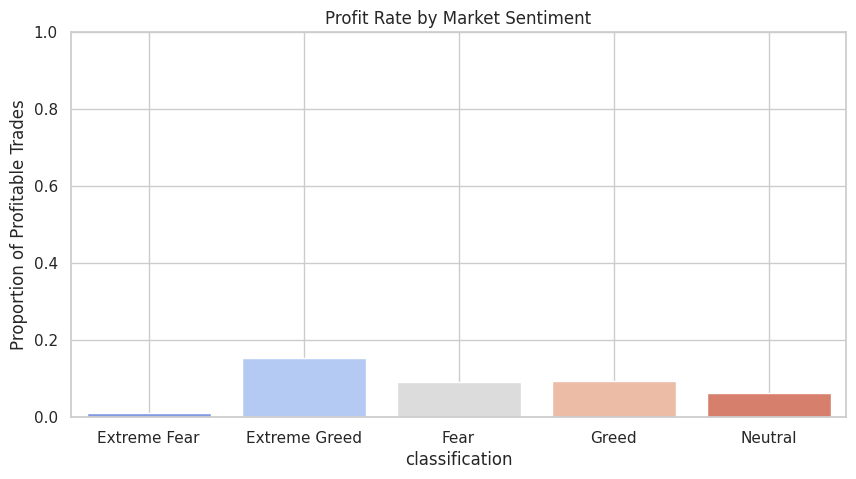

In [40]:
## A. Profit Rate by Sentiment
profit_by_sentiment = merged_df.groupby('classification')['is_profitable'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=profit_by_sentiment.index, y=profit_by_sentiment.values, palette='coolwarm')
plt.title('Profit Rate by Market Sentiment')
plt.ylabel('Proportion of Profitable Trades')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

/tmp/ipython-input-41-800577931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_pnl_by_sentiment = merged_df.groupby('classification')['normalized_pnl'].mean().sort_values()
/tmp/ipython-input-41-800577931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=normalized_pnl_by_sentiment.index, y=normalized_pnl_by_sentiment.values, palette='viridis')


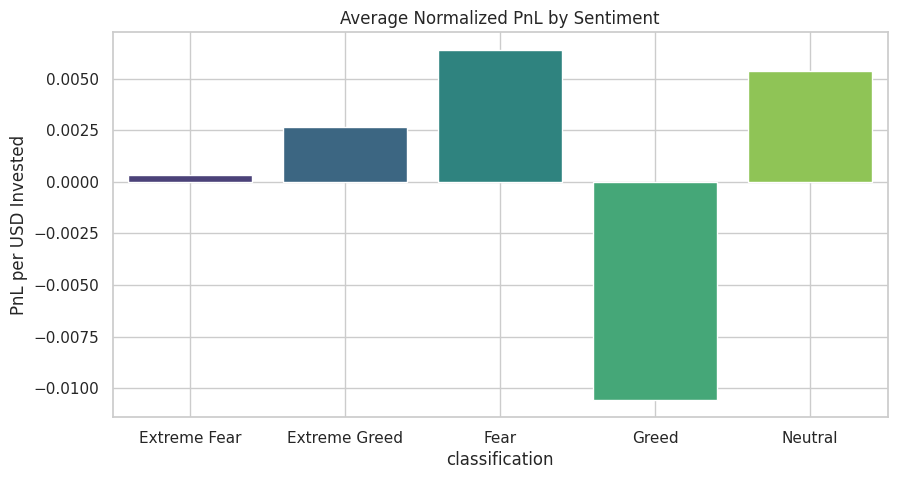

In [41]:
## B. Normalized PnL by Sentiment
normalized_pnl_by_sentiment = merged_df.groupby('classification')['normalized_pnl'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=normalized_pnl_by_sentiment.index, y=normalized_pnl_by_sentiment.values, palette='viridis')
plt.title('Average Normalized PnL by Sentiment')
plt.ylabel('PnL per USD Invested')
plt.grid(True)
plt.show()


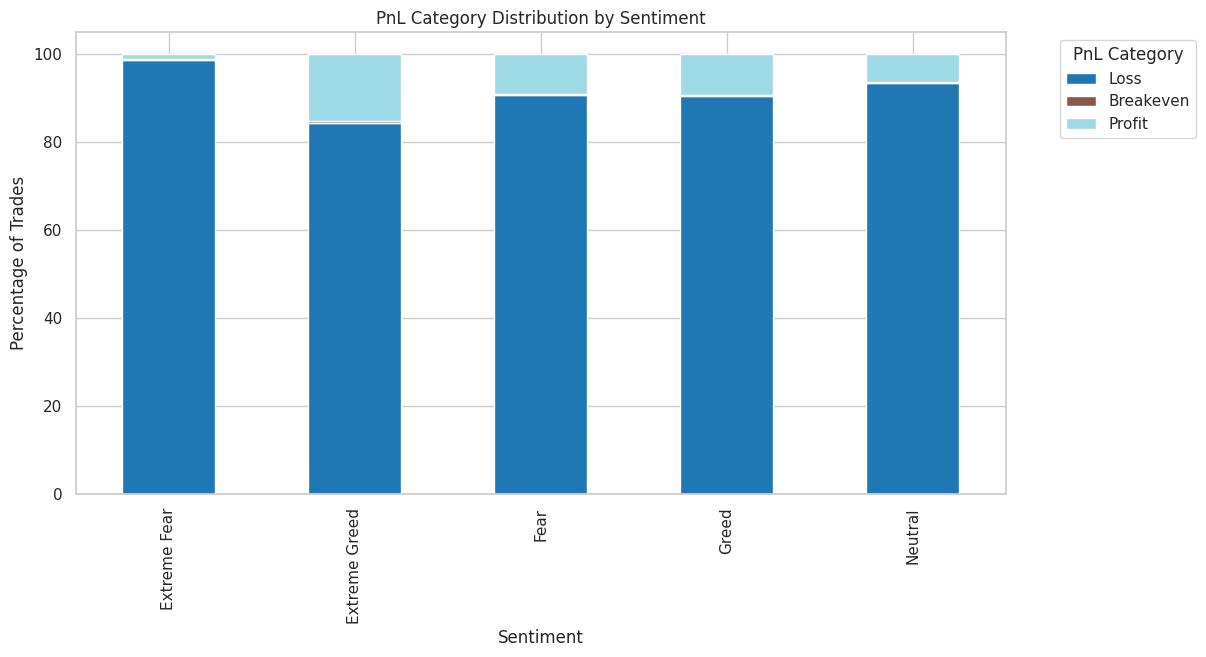

In [42]:
## C. PnL Category Distribution
pnl_category_dist = pd.crosstab(merged_df['classification'], merged_df['pnl_category'], normalize='index') * 100

pnl_category_dist.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12,6))
plt.title('PnL Category Distribution by Sentiment')
plt.ylabel('Percentage of Trades')
plt.xlabel('Sentiment')
plt.legend(title='PnL Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


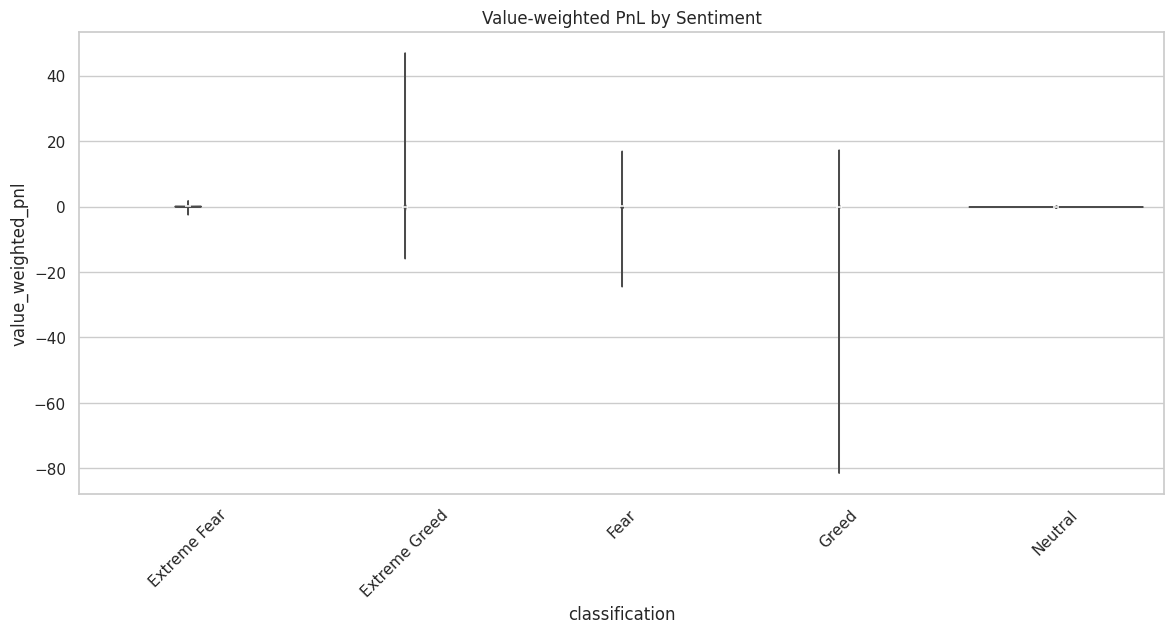

In [39]:
# D.Sentiment vs Value Weighted PnL
sns.violinplot(data=merged_df, x='classification', y='value_weighted_pnl')
plt.title('Value-weighted PnL by Sentiment')
plt.xticks(rotation=45)
plt.show()


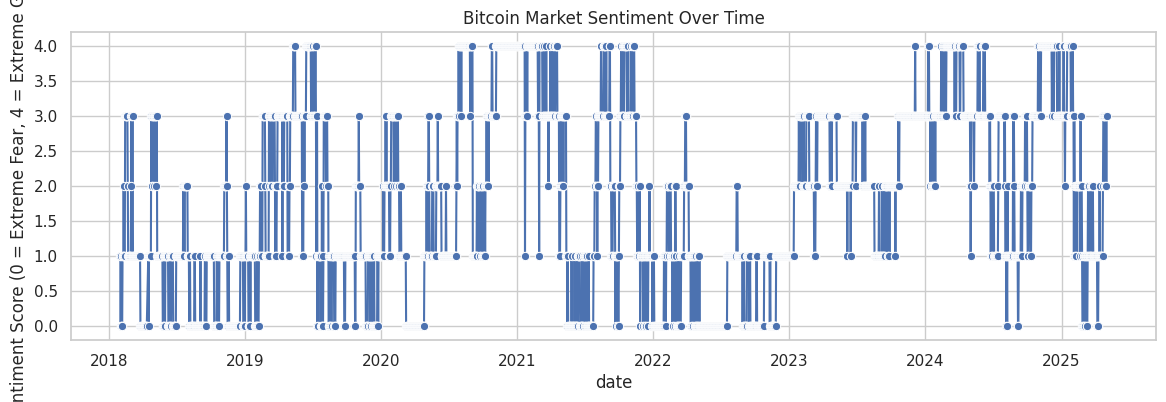

In [43]:
## E. Sentiment Timeline
sentiment_df['sentiment_score'] = sentiment_df['classification'].map(sentiment_map)
sentiment_df_plot = sentiment_df.sort_values('date')

plt.figure(figsize=(14, 4))
sns.lineplot(x=sentiment_df_plot['date'], y=sentiment_df_plot['sentiment_score'], marker='o')
plt.title('Bitcoin Market Sentiment Over Time')
plt.ylabel('Sentiment Score (0 = Extreme Fear, 4 = Extreme Greed)')
plt.grid(True)
plt.show()


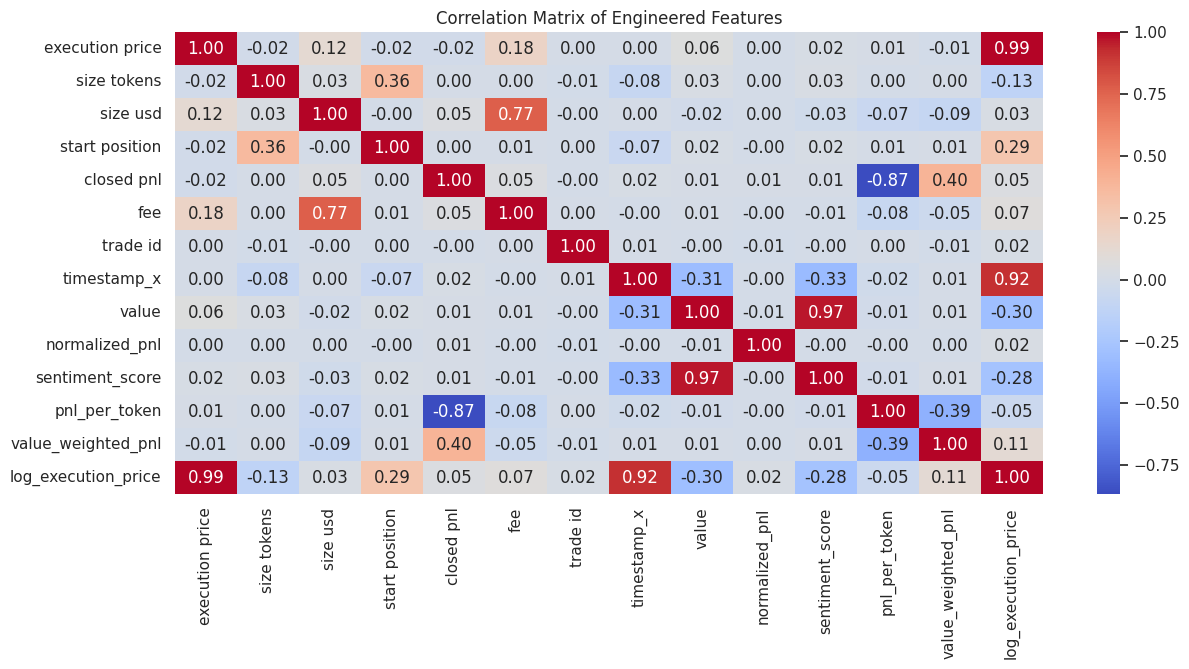

In [44]:
# G. Heatmap of Feature Correlations
correlation_matrix = merged_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Engineered Features')
plt.show()


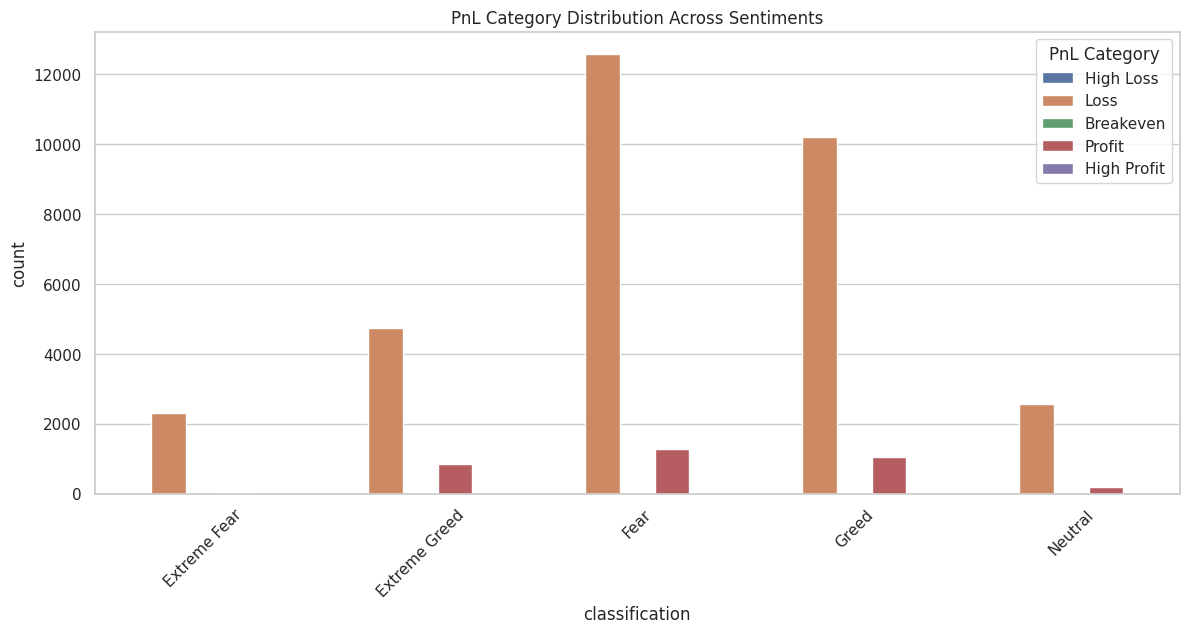

In [45]:
# PnL Category Distribution by Sentiment
sns.countplot(data=merged_df, x='classification', hue='pnl_category')
plt.title('PnL Category Distribution Across Sentiments')
plt.xticks(rotation=45)
plt.legend(title='PnL Category')
plt.show()

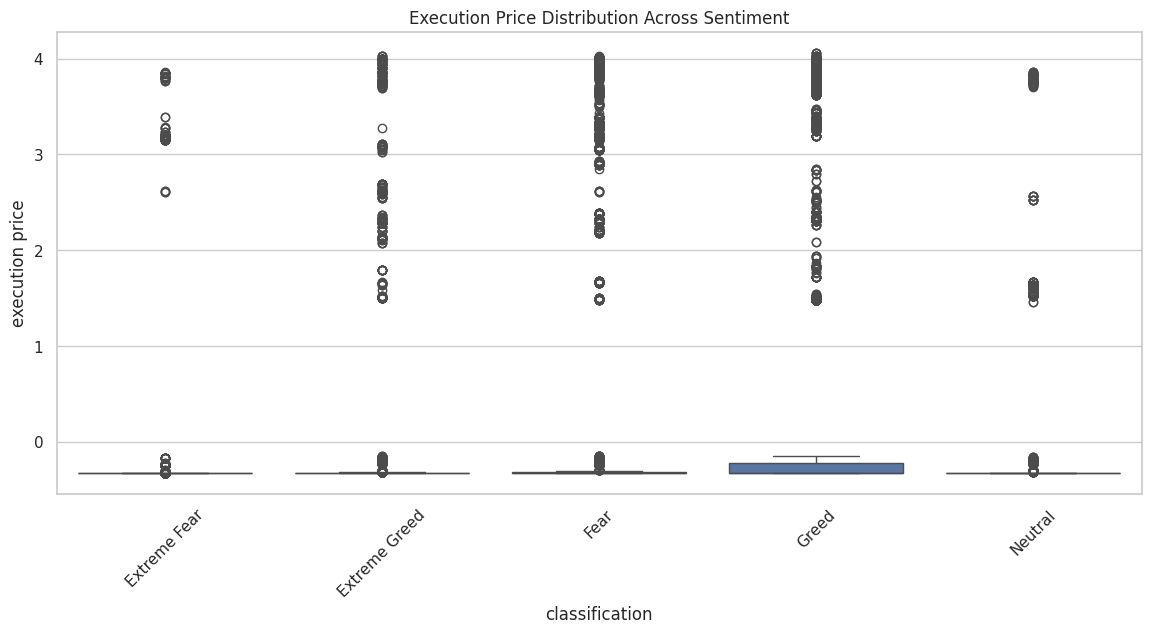

In [46]:
# Execution Price vs Sentiment
sns.boxplot(data=merged_df, x='classification', y='execution price')
plt.title('Execution Price Distribution Across Sentiment')
plt.xticks(rotation=45)
plt.show()


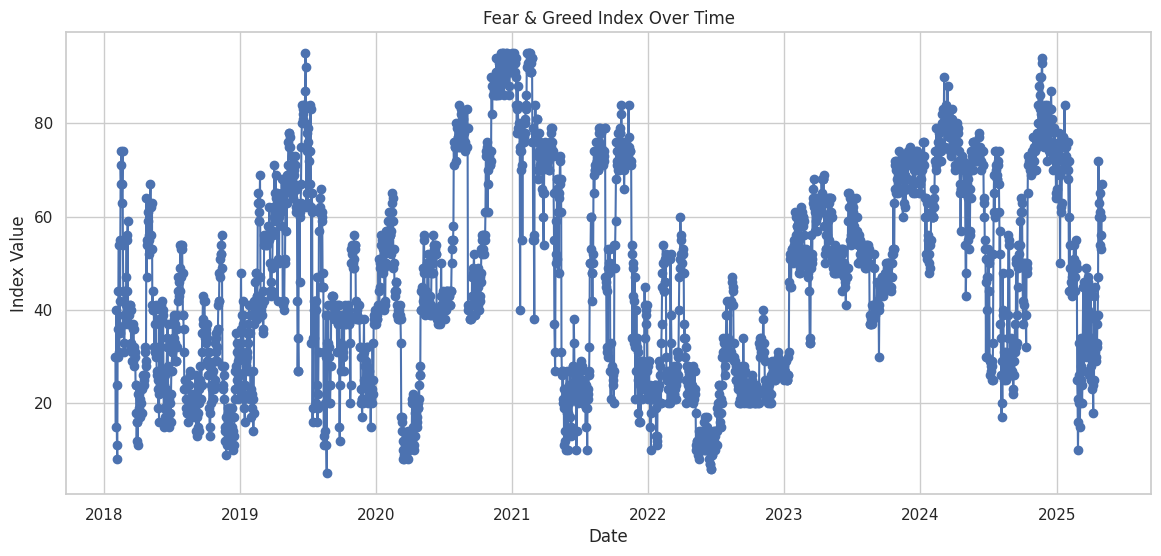

In [48]:
# Time Series of Sentiment Value
sentiment_df_sorted = sentiment_df.sort_values('date')
plt.plot(sentiment_df_sorted['date'], sentiment_df_sorted['value'], marker='o', linestyle='-')
plt.title('Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.show()

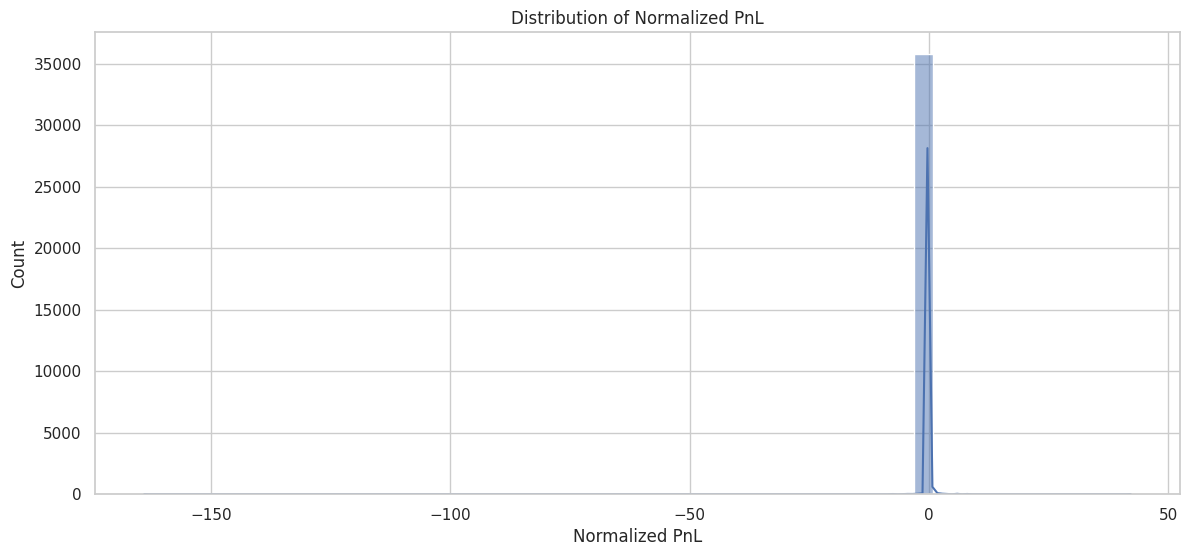

In [49]:
# Histogram of Normalized PnL
sns.histplot(merged_df['normalized_pnl'], bins=50, kde=True)
plt.title('Distribution of Normalized PnL')
plt.xlabel('Normalized PnL')
plt.show()

In [ ]:
# Summary Stats
summary = merged_df.groupby('classification')[['normalized_pnl', 'value_weighted_pnl']].agg(['mean', 'std', 'median', 'count'])
print("\nSummary Statistics by Sentiment Classification:\n")
print(summary)